# Wiring the lightbulbs

You are tasked with wiring lightbulbs in a large warehouse. The location of the lightbulbs are listed below (in the (x,y) coordinates in meters). What is the minimum length of wire we need to make sure that all the bulbs are somehow connected to the breaker which is located at the (0,0).

Do not think too much about the circuit (or the return wire). We need to just connect the bulbs similar to the picture below. Assume that you need only a single wire running.

![Image of subgraph](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Minimum_spanning_tree.svg/600px-Minimum_spanning_tree.svg.png)













In [1]:
## location in (x,y)

light_bulb_locations = [(1.2,1.2),
                       (3.0,4.0),
                       (5.0,4.5),
                       (4.0,5.0),
                       (0.5,0.1),
                       (0.3,5.0),
                       (5.0,5.0),
                       (2.0,3.7),
                       (0.5,3.0),
                       (1.0,3.0)]
light_bulb_locations=[(0, 0)]+light_bulb_locations
light_bulb_locations

[(0, 0),
 (1.2, 1.2),
 (3.0, 4.0),
 (5.0, 4.5),
 (4.0, 5.0),
 (0.5, 0.1),
 (0.3, 5.0),
 (5.0, 5.0),
 (2.0, 3.7),
 (0.5, 3.0),
 (1.0, 3.0)]

In [2]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import pulp
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, value
import networkx as nx

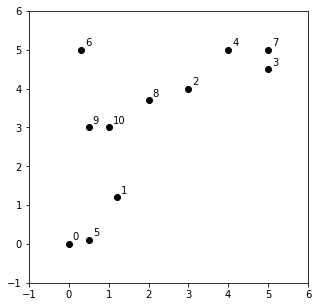

In [3]:
### useful code for plotting bulbs locations

plt.figure(figsize=(5, 5))

# draw problem state
for i, value in enumerate(light_bulb_locations):
    plt.scatter(value[0], value[1], c='black')
    plt.text(value[0]+0.1, value[1]+0.1, f'{i}')
        
plt.xlim([-1, 6])
plt.ylim([-1, 6])

### might be useful for drawing lines connecting dots

#plt.annotate('', xy=[light_bulb_locations[j][0], light_bulb_locations[j][1]], xytext=[light_bulb_locations[i][0], light_bulb_locations[i][1]], arrowprops=arrowprops)

plt.show()

In [4]:
d=distance_matrix(light_bulb_locations, light_bulb_locations, p=2)  # euclidean distance
d[0][5]

0.5099019513592785

In [5]:
model=LpProblem(name='mst', sense=LpMinimize)

In [6]:
x=LpVariable.dicts('x', ((i, j) for i in range(len(light_bulb_locations)) for j in range(len(light_bulb_locations)) if i!=j), cat='Binary')
u=LpVariable.dicts('u', (i for i in range(len(light_bulb_locations))), lowBound=1, upBound=len(light_bulb_locations)-1, cat='Integer')

In [7]:
# constraint
for i in range(len(light_bulb_locations)):
    model+=lpSum(x[i, j] for j in range(len(light_bulb_locations)) if i!=j)>=1
    model+=lpSum(x[j, i] for j in range(len(light_bulb_locations)) if i!=j)>=1
    
for i in range(len(light_bulb_locations)):
    for j in range(len(light_bulb_locations)):
        if i!=j and (i!=0 and j!=0):
            model+=u[j]-u[i]>=1-(len(light_bulb_locations)-1)*(1-x[i, j])

In [8]:
# objective function
model+=lpSum(x[i, j]*d[i][j] for i in range(len(light_bulb_locations)) for j in range(len(light_bulb_locations)) if i!=j)

In [13]:
model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/panithi/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/197209d23495427680bcc7d69e316c11-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/197209d23495427680bcc7d69e316c11-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 117 COLUMNS
At line 958 RHS
At line 1071 BOUNDS
At line 1202 ENDATA
Problem MODEL has 112 rows, 120 columns and 490 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 12.6647 - 0.00 seconds
Cgl0004I processed model has 112 rows, 120 columns (120 integer (110 of which binary)) and 490 elements
Cbc0038I Initial state - 12 integers unsatisfied sum - 2.4
Cbc0038I Pass   1: suminf.    1.60000 (8) obj. 13.5484 iterations 29
Cbc0038I Pass   2: suminf.    1.60000 (4) obj. 16.4359 iterations 21
Cbc0038I Pass   3: suminf.    1.60000 (4) obj

1

In [12]:
print(model.objective.value())

18.202414874673835


In [10]:
from ast import literal_eval as make_tuple

wiring=[]
for var in model.variables():
    if var.name[0] == 'x' and var.value() == 1:
        print(var.name, var.value())
        a=var.name.replace('_', '')
        wiring.append(make_tuple(a[1:]))
    elif var.name[0] == 'u':
        print(var.name, var.value())
        
wiring

u_1 2.0
u_10 3.0
u_2 5.0
u_3 6.0
u_4 8.0
u_5 1.0
u_6 9.0
u_7 7.0
u_8 4.0
u_9 10.0
x_(0,_5) 1.0
x_(1,_10) 1.0
x_(10,_8) 1.0
x_(2,_3) 1.0
x_(3,_7) 1.0
x_(4,_6) 1.0
x_(5,_1) 1.0
x_(6,_9) 1.0
x_(7,_4) 1.0
x_(8,_2) 1.0
x_(9,_0) 1.0


[(0, 5),
 (1, 10),
 (10, 8),
 (2, 3),
 (3, 7),
 (4, 6),
 (5, 1),
 (6, 9),
 (7, 4),
 (8, 2),
 (9, 0)]

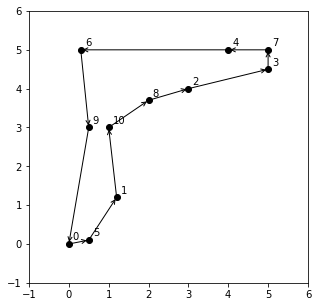

In [11]:
plt.figure(figsize=(5, 5))

# draw problem state
for i, value in enumerate(light_bulb_locations):
    plt.scatter(value[0], value[1], c='black')
    plt.text(value[0]+0.1, value[1]+0.1, f'{i}')
        
plt.xlim([-1, 6])
plt.ylim([-1, 6])

### might be useful for drawing lines connecting dots

arrowprops=dict(arrowstyle='->')
for i, j in wiring:
    plt.annotate('', xy=[light_bulb_locations[j][0], light_bulb_locations[j][1]], xytext=[light_bulb_locations[i][0], light_bulb_locations[i][1]], arrowprops=arrowprops)

plt.show()

Repeat the previous question. However, in this case there is another breaker that we can also use located at (6.0,5.0). What would be the minimum total length of the wire that we need?